The purpose of this notebook is to gain insights into the Amazon bestselling books dataset and to provide business solutions related to the genre of the most  books sold.Also will try to see business value  by extracting insights about which authors outperformed based on user ratings and reviews.The pricing of books by genre will also be a focus of analysis.


# 1.Data loading 

In [3]:
#import the libraries
import pandas as pd
import numpy as np

In [24]:
#importing Amazon top 50 bestselling books dataset as excel file
Amazon_data=pd.read_excel(r'/Users/vaio/Desktop/Excel_Data_Work/Amazon Data.xlsx')


In [25]:
#setting dataset to view maximum rows
pd.set_option('display.max_rows',None)
print(Amazon_data)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
5        A Dance with Dragons (A Song of Ice and Fire)   
6    A Game of Thrones / A Clash of Kings / A Storm...   
7                       A Gentleman in Moscow: A Novel   
8        A Higher Loyalty: Truth, Lies, and Leadership   
9                            A Man Called Ove: A Novel   
10                           A Man Called Ove: A Novel   
11   A Patriot's History of the United States: From...   
12                             A Stolen Life: A Memoir   
13                    A Wrinkle in Time (Time Quintet)   
14   Act Like a Lady, Think Like a Man: What Men Re...   
15   Adult Coloring Book Designs: Stress Relief Col...   
16   Adult Col

## 2.Data cleaning and  exploration

In [26]:
#checking for null values in each column
Amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


There are no null values in this dataset.There are total of 550 values in each column.

In [27]:
#looking into maximum and minimum values in the dataset
Amazon_data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


The minimum price value reveals that there are books in the dataset that are free of charge.The most expensive book in the data set have a value above USD100.

In [8]:
#number of columns and rows in the dataset
Amazon_data.shape

(550, 7)

In [9]:
len(Amazon_data)

550

In [28]:
Amazon_data.count()

Name           550
Author         550
User Rating    550
Reviews        550
Price          550
Year           550
Genre          550
dtype: int64

In [29]:
#check the column names
Amazon_data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [12]:
Amazon_data.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')>

In [30]:
#a look into the list of authors in the dataset
Amazon_data['Author'].to_list

<bound method IndexOpsMixin.tolist of 0                                JJ Smith
1                            Stephen King
2                      Jordan B. Peterson
3                           George Orwell
4                National Geographic Kids
5                     George R. R. Martin
6                     George R. R. Martin
7                             Amor Towles
8                             James Comey
9                         Fredrik Backman
10                        Fredrik Backman
11                       Larry Schweikart
12                          Jaycee Dugard
13                      Madeleine L'Engle
14                           Steve Harvey
15            Adult Coloring Book Designs
16                     Blue Star Coloring
17                     Blue Star Coloring
18              Coloring Books for Adults
19                            Ron Chernow
20                          Anthony Doerr
21                          Anthony Doerr
22                          Veronica R

In [14]:
#a list of number of  reviews
Amazon_data['Reviews'].to_list

<bound method IndexOpsMixin.tolist of 0      17350
1       2052
2      18979
3      21424
4       7665
5      12643
6      19735
7      19699
8       5983
9      23848
10     23848
11       460
12      4149
13      5153
14      5013
15      2313
16      2925
17      2951
18      2426
19      9198
20     36348
21     36348
22      6310
23     15921
24     12159
25       798
26      9374
27       491
28      5360
29      1909
30      1296
31       615
32     61133
33     61133
34     11113
35     10070
36     10070
37      3729
38      9769
39       471
40     14344
41     14344
42      4505
43     10369
44     16244
45      2884
46     22614
47     22614
48     22614
49      4761
50      1542
51      1542
52      1542
53      6143
54      4022
55      3871
56      4866
57      4866
58      1329
59      4642
60      1541
61      1924
62      2094
63     10922
64     10922
65     10922
66     10922
67      2137
68      1651
69      6679
70      6679
71      6812
72      3837
73      6540


In [31]:
Amazon_data.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [32]:
Amazon_data.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


There are books from two genres:fiction and non fiction.Also the dataset shows the author's name, the user ratings given to the book along with number of reviews of the book in a given year.There are book names that occured repeatedly every year with same user rating and review numbers.Perhaps that book was republished in the following years.

In [33]:
#can also check individually about a book with a particular name
Amazon_data[Amazon_data['Name']=='The Great Gatsby']

,Name,Author,User Rating,Reviews,Price,Year,Genre
394,The Great Gatsby,F. Scott Fitzgerald,4.4,11616,7,2012,Fiction
395,The Great Gatsby,F. Scott Fitzgerald,4.4,11616,7,2013,Fiction
396,The Great Gatsby,F. Scott Fitzgerald,4.4,11616,7,2014,Fiction


This shows that there are books in the dataset that appeared multiple times each year.

In [34]:
#number of times the name of the author appeared in the dataset
Amazon_data['Author'].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Gallup                                 9
Dr. Seuss                              9
Rob Elliott                            8
Bill O'Reilly                          7
Eric Carle                             7
Dav Pilkey                             7
Stephen R. Covey                       7
Stephenie Meyer                        7
E L James                              6
J.K. Rowling                           6
Harper Lee                             6
Sarah Young                            6
Stieg Larsson                          6
Don Miguel Ruiz                        6
The College Board                      6
Patrick Lencioni                       5
Dale Carnegie                          5
Giles Andreae                          5
Roger Priddy                           5
R. J. Palacio   

In [35]:
#check the book name based on author
Amazon_data[ Amazon_data['Author']=='Dr. Seuss']

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
250,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2017,Fiction
251,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction
528,What Pet Should I Get? (Classic Seuss),Dr. Seuss,4.7,1873,14,2015,Fiction


In [36]:
#a list of all the authors in this dataset
Amazon_data['Author'].unique().tolist()

['JJ Smith',
 'Stephen King',
 'Jordan B. Peterson',
 'George Orwell',
 'National Geographic Kids',
 'George R. R. Martin',
 'Amor Towles',
 'James Comey',
 'Fredrik Backman',
 'Larry Schweikart',
 'Jaycee Dugard',
 "Madeleine L'Engle",
 'Steve Harvey',
 'Adult Coloring Book Designs',
 'Blue Star Coloring',
 'Coloring Books for Adults',
 'Ron Chernow',
 'Anthony Doerr',
 'Veronica Roth',
 'Chris Kyle',
 'Khaled Hosseini',
 'Glenn Beck',
 'Neil deGrasse Tyson',
 'Mark Twain',
 'DK',
 'Angie Grace',
 'Ina Garten',
 'Michelle Obama',
 'Atul Gawande',
 'Ta-Nehisi Coates',
 'Bruce Springsteen',
 'Stephenie Meyer',
 'Bill Martin Jr.',
 'Jeff Kinney',
 "Sasha O'Hara",
 'David Goggins',
 'Thomas Piketty',
 'Suzanne Collins',
 'Chrissy Teigen',
 'Francis Chan',
 'Kevin Kwan',
 'Marjorie Sarnat',
 'Abraham Verghese',
 'BreneÃÅ Brown',
 'Malcolm Gladwell',
 'Charlaine Harris',
 'Rod Campbell',
 'George W. Bush',
 'Tony Hsieh',
 'American Psychiatric Association',
 'M Prefontaine',
 'Zhi Gang Sha'

In [37]:
#drop the books from the dataset that appeared multiple times over the years with same number of user ratings and reviews.
Amazon_datadup=Amazon_data.drop_duplicates('Name')
Amazon_datadup

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [38]:
#dataset after dropping the names of books that appeared repeatedly in the dataset.
Amazon_datadup.shape

(351, 7)

In [40]:
# list of  years included in the dataset 
year_values = Amazon_datadup['Year'].unique().tolist()
print('min:', min(year_values))
print('max:', max(year_values))
print('all years:', year_values)

min: 2009
max: 2019
all years: [2016, 2011, 2018, 2017, 2019, 2014, 2010, 2009, 2015, 2013, 2012]


In [41]:
#renaming column heading
Amazon_datadup_new=Amazon_datadup.rename(columns={'User Rating': 'User_rating'})
Amazon_datadup_new

,Name,Author,User_rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [42]:
Amazon_genre=Amazon_datadup_new.groupby('Genre').count()

In [43]:
#count of books by genre
Amazon_genre

,Name,Author,User_rating,Reviews,Price,Year
Genre,,,,,,
Fiction,160,160,160,160,160,160
Non Fiction,191,191,191,191,191,191


In [44]:
Amazon_datadup_new.groupby('Genre')['Genre'].count()

Genre
Fiction        160
Non Fiction    191
Name: Genre, dtype: int64

There are more non fiction than fiction books in this dataset.This is also visible from the pie chart below.

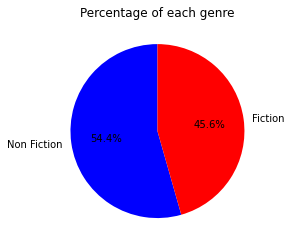

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

slices = [191, 160]
activities = ['Non Fiction', 'Fiction']
colors = ['b', 'r']
plt.pie(slices, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
plt.title('Percentage of each genre')
plt.show()


In [ ]:
#check correlation between two columns
Amazon_datadup_new['User_rating'].corr(Amazon_datadup_new['Price'])

In [ ]:
#check correlation between user ratings and reviews
Amazon_datadup_new['User_rating'].corr(Amazon_datadup_new['Reviews'])

In [ ]:
#check correlation between reviews and price
Amazon_datadup_new['Reviews'].corr(Amazon_datadup_new['Price'])

The relationship between user ratings and price and also between reviews and price is negative.Since the values are almost close to zero, it shows that there is not much correlation of user ratings and reviews with pricing of books.Even the correlation between user ratings and reviews is also very close to zero.

# 3.Data Analysis

In [ ]:
#who is the best author based on number of reviews.
best_author=Amazon_datadup_new.groupby('Author')['Reviews'].sum()
best_author

In [ ]:
best_author.sample(20)

In [ ]:
#best author based on average number of  reviews

best_author=Amazon_data.groupby(['Author']).Reviews.mean()
best_author

In [ ]:
best_author=Amazon_datadup_new.groupby(['Author']).Reviews.mean().sort_values().apply(int)
best_author

The author with the maximum reviews is Delia Owens with 87,841 on average reviews over the years.

In [ ]:
#average number of reviews by genre
Amazon_datadup_new.groupby('Genre')['Reviews'].mean()

Despite having more non fiction books in the dataset , there are more reviews for fiction books.There might be a case that fiction readers are more willing to leave reviews for books.

In [ ]:
#dataset of fiction books only
cond = Amazon_datadup_new['Genre']=='Fiction'
Fiction = Amazon_datadup_new[cond]

In [ ]:
#sorting fiction data by reviews
Fiction.sort_values(by='Reviews')

In fiction genre the author with most reviews is Delia Owens for her adult ficiton book Where the Crawdads Sing

In [ ]:
#sorting fiction data by user ratings
Fiction.sort_values(by='User_rating')

In [ ]:
Fiction.sort_values(by='Price')

Based on highest user ratings in the ficiton category the children's fiction books topped the category.

In [ ]:
#parsing data by non fiction genre
cond=Amazon_datadup_new['Genre']== 'Non Fiction'

In [ ]:
Non_Fiction = Amazon_datadup_new[cond]

In [ ]:
#sorting non fiction data by reviews
Non_Fiction.sort_values(by='Reviews')

In non fiction category the book Becoming by Michelle Obama has the most reviews.

In [ ]:
#sorting non fiction data by user rating
Non_Fiction.sort_values(by='User_rating')

In [ ]:
Non_Fiction.sort_values(by='Price')

There a number of  non-ficiton books that cover a wide array of stories with highest user rating.

In [ ]:
#Now we will see which author has maximum books in this dataset in each genre.
Max_books=Fiction.groupby(['Author']).Name.count().sort_values(ascending=False)
Max_books

In [ ]:
Max_books=Non_Fiction.groupby(['Author']).Name.count().sort_values(ascending=False)
Max_books

Jeff Kinney, a children's author , in fiction category and Bill O'Reilly in non fiction category have the highest number of books in the dataset.

In [56]:
#find out books in the most expensive catergory  with highest user ratings.
max_price=Amazon_datadup_new['Price'].max()
cond=Amazon_datadup_new['Price']==max_price
max_price_data=Amazon_datadup_new[cond]

#find most expensive book and the number of user ratings
max_rating=max_price_data['User_rating'].max()
cond=max_price_data['User_rating']==max_rating
max_rated_expen=max_price_data[cond]
max_rated_expen

,Name,Author,User_rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction


A very specific subject book has the highest user rating,despite being expensive.

In [57]:
#find out books in least expensive (or free) category 
min_price = Amazon_datadup_new['Price'].min()
cond = Amazon_datadup_new['Price'] == min_price
min_price_data = Amazon_datadup_new[ cond ]

# find max rated book with the min price
max_rating = min_price_data['User_rating'].max()
cond = min_price_data['User_rating']== max_rating
max_rated_cheapest = min_price_data[cond]
max_rated_cheapest

,Name,Author,User_rating,Reviews,Price,Year,Genre
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction


In fiction catgeory ,the cheapest book with highest rating is the children's book.

In [58]:
#book(s)with highest number of reviews in recent year
latest_year=Amazon_datadup_new['Year'].max()
cond= Amazon_datadup_new['Year']==latest_year
max_year_data=Amazon_datadup_new[cond]

max_reviews=max_year_data['Reviews'].max()
cond=max_year_data['Reviews']==max_reviews
max_rated_year=max_year_data[cond]
max_rated_year.head(5)

,Name,Author,User_rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [ ]:
In the most recent year,2019, the book with maximum reviews is Where the Crawdads Sing by Delia Owens.It is a book in fiction catergory.

In [ ]:
#book(s) with highest user rating in recent year
latest_year=Amazon_datadup_new['Year'].max()
cond= Amazon_datadup_new['Year']==latest_year
max_year_data=Amazon_datadup_new[cond]

max_ratings=max_year_data['User_rating'].max()
cond=max_year_data['User_rating']==max_ratings
max_rated_year=max_year_data[cond]
max_rated_year

In [ ]:
In most recent year books with highest user ratings are mostly fiction books.

In [ ]:
#user ratings over the years
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

dff = pd.DataFrame(Amazon_datadup_new.groupby(['Year','Genre'])['User_rating'].mean())
dff2 = dff.pivot_table(index='Year', columns='Genre', values='User_rating')
dff2.plot.bar()

In the last few years fiction books have slightly higher user ratings than non fiction books.

In [ ]:
Amazon_datadup_new.head(3)

In [ ]:
#seperate number of reviews by genre
rev_unstacked = Amazon_datadup_new.groupby(['Year','Genre'])['Reviews'].sum().unstack()
rev_unstacked

Genre  Fiction  Non Fiction
Year                       
2009    156824        78682
2010    139127        70196
2011    115518       110558
2012    313801        86133
2013    278584        93666
2014    210001       112813
2015    241801       154392
2016    128769       145083
2017    205060        88313
2018    122869       256512
2019    185417       145570


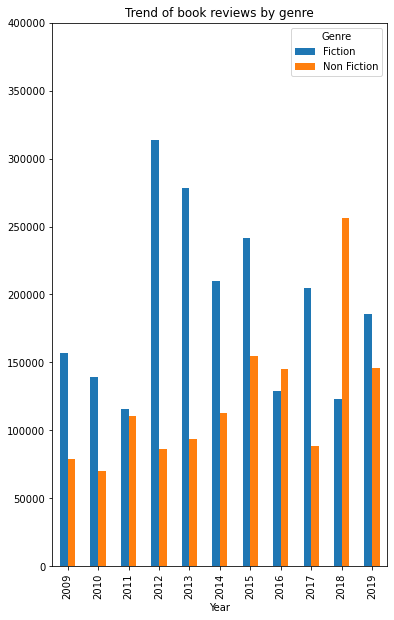

In [48]:
# reviews trend in both genres
import matplotlib.pyplot as plt
%matplotlib inline
rev_unstacked = Amazon_datadup_new.groupby(['Year','Genre']).Reviews.sum().unstack()      
print(rev_unstacked)
rev_unstacked.plot(kind='bar',figsize=(6,10))
plt.ylim(0,400_000)
plt.title('Trend of book reviews by genre')
plt.show()



In [ ]:
In terms of reviews, fiction books  mostly have higher reviews than non fiction books.

# 4.Conclusion:
Based on the limited data analysis, the fiction readers seem to be more inclined to leave a book review than non fiction readers.
Children's fiction is a popular category among readers in fiction genre based on user ratings.Most of the less pricey books also happen to be children's literature.
In non fiction category ,books related to very specific subject matter command a high price.
Also in non ficiton category, based on user ratings, reviews and pricing,the interests of readers are quite diverse.